# Exercice 1: Historic Ciphers

## PART A: Ciphers

### A.1 Setup 

Useful libraries: 
file encoding/decoding [`unicodedata`](https://docs.python.org/2/library/unicodedata.html)
, [`string`](https://docs.python.org/2/library/string.html)
, regular expressions [`re`](https://docs.python.org/2/library/re.html)
, [`random`](https://docs.python.org/2/library/random.html)
, [`math`](https://docs.python.org/2/library/math.html)
, [`numpy`](https://www.numpy.org/)
, [`matplotlib`](https://matplotlib.org/)

In [1]:
import unicodedata, string, re, random, math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import collections

In [2]:
def convert(s):
    "Convert the string 's', supposed to be encoded in UTF-8, into a very simple one."
    tmp1 = unicodedata.normalize('NFKD', s) # decode the input string
    tmp2 = tmp1.encode('ASCII', 'ignore').decode('utf8') # convert it to ASCII (remove accents) and to UTF8
    tmp3 = re.sub('[\W\d_]+', ' ', tmp2) # convert non-[a-zA-Z] chars into 1 space
    tmp4 = re.sub('^\s*|\s*$', '', tmp3) # remove leading/trailing spaces
    tmp5 = tmp4.upper() # convert to upcase
    return tmp5

In [3]:
# test convert 
for s in ["abcxyz -_ 0129 ABCXYZ", "A,;.!?\"`'A", "àâÀÂçÇéèëêÉÈËÊïîÏÎôÔùüûÙÜÛ"]:
    print(convert(s))

ABCXYZ ABCXYZ
A A
AAAACCEEEEEEEEIIIIOOUUUUUU


Alphabet translation can be easly managed using the `translate` function from the `str` class. It uses a translation table generated by the `maketrans` related function.

See the documentation:
```python 
help(str.translate)
help(str.maketrans)
```

In [4]:
help(str.maketrans)

Help on built-in function maketrans:

maketrans(...)
    Return a translation table usable for str.translate().
    
    If there is only one argument, it must be a dictionary mapping Unicode
    ordinals (integers) or characters to Unicode ordinals, strings or None.
    Character keys will be then converted to ordinals.
    If there are two arguments, they must be strings of equal length, and
    in the resulting dictionary, each character in x will be mapped to the
    character at the same position in y. If there is a third argument, it
    must be a string, whose characters will be mapped to None in the result.



In [5]:
def read_file(filename):
    "Read the text in 'filename' and convert it into a very simple, but possibly large, string."
    res = []
    with open(filename, 'r') as f:
        for l in f:
            line = convert(l)
            if line: # do not append empty lines
                res.append(line)
    return ' '.join(res)

In [7]:
nemo = read_file('texts/jules_verne__vingt_mille_lieues_sous_les_mers_ch1.txt')
print(nemo[:200])

CHAPITRE PREMIER UN ACUEIL FUYANT LATMANNAE FUT MARQUAE PAR UN AVANEMENT BIZARRE UN PHANOMA NE INEXPLIQUA ET INEXPLICABLE QUE PERSONNE NATMA SANS DOUTE OUBLIA SANS PARLER DES RUMEURS QUI AGITAIENT LES


In [8]:
tbl_example = str.maketrans('ABCDEF', '012345')
'ABCDEFGHIKL'.translate(tbl_example)

'012345GHIKL'

In the `string` module there are predefined alphabets.

In [9]:
for a in [string.ascii_uppercase, string.ascii_lowercase, string.ascii_letters, string.digits, string.printable]:
    print(a)

ABCDEFGHIJKLMNOPQRSTUVWXYZ
abcdefghijklmnopqrstuvwxyz
abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
0123456789
0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	



In [10]:
alpha = string.ascii_uppercase
alphaws = string.ascii_uppercase + ' '    # alphabet with space char
print(alpha, alpha)
print(alphaws, alphaws)

ABCDEFGHIJKLMNOPQRSTUVWXYZ ABCDEFGHIJKLMNOPQRSTUVWXYZ
ABCDEFGHIJKLMNOPQRSTUVWXYZ  ABCDEFGHIJKLMNOPQRSTUVWXYZ 


In [11]:
arrival = 'ARRIVAL AT FIVE IN PARIS'   # course example

### A.2 Caesar Cipher

**QUESTION**: implement the Caesar method using the skeleton below and it test it on a few examples.

```python
def cshift(s, n):
    "Circular shift of string 's' by 'n' positions to the left."
    pass

def substitution_encrypt(s, table):
    "Encrypt string 's' using substitutions from translation 'table'."
    pass
```

**QUESTION**: how the decryption can be performed easily?

In [12]:
def cshift(s, n):
    "Circular shift of string 's' by 'n' positions to the left."
    return s[n:] + s[:n]

def substitution_encrypt(s, table):
    "Encrypt string 's' using substitutions from translation 'table'."
    return s.translate(table)

In [13]:
p = arrival
print("p : " + p)

#encryption using a transposition, shift to the right
c = substitution_encrypt(arrival, str.maketrans(alphaws, cshift(alphaws, 3)))
print("c : " + c)

#decyption using a transposition, shift to the left
d = substitution_encrypt(c, str.maketrans(alphaws, cshift(alphaws, -3)))
print("d : " + d)

p : ARRIVAL AT FIVE IN PARIS
c : DUULYDOCDWCILYHCLQCSDULV
d : ARRIVAL AT FIVE IN PARIS


### A.3 Substitution Ciphering with a Random Permutation

**QUESTION**: implement the random permutation/shuffle of the alphabet and use it accordingly to the skeleton below and test it on a few examples.

```python
def shuffle(s):
    "Randomly shuffle string 's'."
    pass
```

In [14]:
def shuffle(s):
    "Randomly shuffle string 's'."
    l = list(s)
    random.shuffle(l)
    return ''.join(l)

In [15]:
k = shuffle(alphaws)
print("k : " + k)

p = arrival
print("p : " + p)

#encryption using a transposition, random permutation
c = substitution_encrypt(arrival, str.maketrans(alphaws, k))
print("c : " + c)

#decryption using a transposition, coming back to the initial alphabet
d = substitution_encrypt(c, str.maketrans(k, alphaws))
print("d : " + d)

k : YLBUDOKGM JFZIWCNAXREPTSVHQ
p : ARRIVAL AT FIVE IN PARIS
c : YAAMPYFQYRQOMPDQMIQCYAMX
d : ARRIVAL AT FIVE IN PARIS


### A.4 Vigenère Cipher

**QUESTION**: Model the Vigenère table using a dict of dict in order to write something like `vigenere['key char']['plain text char']  -> 'cipher text char'`. Write an encryption function using the skeleton below and test it on a few examples.

```python
def vig_encrypt(s, key, tbl):
    "Encrypt the string 's' using Vigenère cipher and 'key' and table 'tbl'."
    pass
```

**QUESTION**: how the decryption can be performed easily?

In [16]:
def vig_table():
    "Returns the Vigenère table using the format vigenere['key char']['plain text char']  -> 'cipher text char'"
    v = {}
    a = alphaws
    for k in alphaws:
        v[k] = {}
        for p in alphaws:
            v[k][p] = a[0]
            a = cshift(a, 1)            
        a = cshift(a, 1)
    return v

def vig_table_inv():
    "Returns the Vigenère table using the format vigenere['key char']['cipher text char']  -> 'plain text char'"
    v = {}
    a = alphaws
    for k in alphaws:
        v[k] = {}
        for p in alphaws:
            v[k][a[0]] = p
            a = cshift(a, 1)
        a = cshift(a, 1)    
    return v

def vig_encrypt(s, key, tbl):
    "Encrypt the string 's' using Vigenère cipher and 'key' and table 'tbl'."
    #repeat the key to match the plaintext size
    #this is the required key
    key = (key * (int(len(s)/len(key))+1))[:len(s)]    
    c = ""
    for p, k in zip(s, key):
        c += tbl[k][p]
    return c


In [17]:
key = "TUESDAY"
print("key : " + key)

plaintext = arrival
print("plaintext : " + plaintext)

ciphertext = vig_encrypt(plaintext, key, vig_table())
print("ciphertext : " + ciphertext)

d_plaintext = vig_encrypt(ciphertext, key, vig_table_inv())
print("d_plaintext : " + d_plaintext)

key : TUESDAY
plaintext : ARRIVAL AT FIVE IN PARIS
ciphertext : TKV YAISUXRIISXTMECPYJBW
d_plaintext : ARRIVAL AT FIVE IN PARIS


### A.5 Basic Transposition Cipher

**QUESTION**: implement the first transposition cipher presented during the course using the skeleton below.

*Hints*: 

- use a Numpy array to store a matrix of letters (`dtype=np.dtype('S1')`).
- in a first time, assume that there are no duplicates in the key word.

```python
def str2positions(s):
    "Generate the list of positions of chars in alphabetic order from the string 's'."
    pass

def str2matrix(s, lines, columns, padding=' '):
    """Transform the string 's' into a Numpy matrix with ('lines', 'columns') char elements 
    and 'padding' char for all non specified elements after the end of 's'."""
    pass

def matrix2str(m):
    "Transform the matrix 'm' into a string by reading 'm' line by line."
     pass
    
def transposition_encrypt(s, key, padding=' '):
    "Encrypt the string 's' using a tranposition with the secret 'key' composed of unique letters."
    pass

def transposition_decrypt(s, key):
    "Decrypt string 's' using a transposition with the secret 'key' composed of unique letters."
    pass
```

In [18]:
def str2positions(s):
    "Generate the list of positions of chars in alphabetic order from the string 's'."
    # MALTE > 14203
    tmp = []
    for c in s:
        tmp.append(list(alphaws).index(c))
    l = np.argsort(tmp)
    return l

def str2matrix(s, lines, columns, padding=' '):
    """Transform the string 's' into a Numpy matrix with ('lines', 'columns') char elements 
    and 'padding' char for all non specified elements after the end of 's'."""
    s = s + padding * (lines*columns-len(s)) # Padding    
    s = re.findall("." * lines,s) # Découpage en segments    
    m = np.zeros([lines, columns], dtype=np.dtype('S1')) # Création de la matrice    
    for i in range(lines):
        m[i] = list(s[i])        
    return m

def matrix2str(m):
    "Transform the matrix 'm' into a string by reading 'm' line by line."
    s = ""
    for l in m:
        for c in l:
            s += c.decode('UTF-8')
    return s
    

def transposition_encrypt(s, key, padding=' '):
    "Encrypt the string 's' using a tranposition with the secret 'key' composed of unique letters."
    lines = math.ceil(len(s)/len(key))
    columns = len(key)
    m = str2matrix(s, lines, columns, padding)
    cyphertext = ""
    
    for k in str2positions(key):
        for c in m[:,k]:
            cyphertext += c.decode('UTF-8')
            
    return cyphertext

def transposition_decrypt(s, key):
    "Decrypt string 's' using a transposition with the secret 'key' composed of unique letters."
    lines = math.ceil(len(s)/len(key))
    columns = len(key) 
    m = np.zeros([lines, columns], dtype=np.dtype('S1')) # Création de la matrice
    s = re.findall("." * lines,s) # Découpage en segments
    
    for i, k in enumerate(str2positions(key)):
        m[:,k] = list(s[i])
        
    return matrix2str(m)

In [19]:
k = "MALTE"
print("k : " + k)

p = arrival
print("p : " + p)

c = transposition_encrypt(p, k)
print("c : " + c)

d = transposition_decrypt(c, k)
print("d : " + d)

k : MALTE
p : ARRIVAL AT FIVE IN PARIS
c : RLFIRVTEP R INIAA  AIAV S
d : ARRIVAL AT FIVE IN PARIS 


## PART B: Attacks based on Frequency Analysis

Use the `Counter` container from the `collections` module [doc](https://docs.python.org/2/library/collections.html).

*Hint*: a `Counter` can be updated to add entries without any letters counted using `Counter.update({c:0 for c in alphaws})`. 


### B.1 Setup

In [20]:
from collections import Counter
# help(Counter)

In [21]:
#help(Counter)

In [22]:
ref_fr = read_file('texts/arthur_conan_doyle__le_chien_des_baskervilles_ch1.txt')
ref_en = read_file('texts/arthur_conan_doyle__the_hound_of_the_baskervilles_ch1.txt')
ref_es = read_file('texts/arthur_conan_doyle__el_sabueso_de_los_baskerville_ch1.txt')
cnt_ref_fr, cnt_ref_en, cnt_ref_es = Counter(ref_fr), Counter(ref_en), Counter(ref_es)

In [23]:
#print(cnt_ref_fr)

In [24]:
alice = read_file('texts/lewis_caroll__alice_au_pays_des_merveilles.txt')
disparition = read_file('texts/georges_perec__la_disparition_extrait.txt')
curieux = read_file('texts/jacques_arago__curieux_voyage_autour_du_monde.txt')

In [25]:
def plot_distributions(ld, ll):
    """Plot the distributions of letters frequencies in the list 'ld'. 
    Each distribution should be a 'Counter' object. 
    They all should have the same alphabet.
    """
    plt.figure(figsize=(15, 5))
    alphabet = sorted(ld[0].keys()) 
    width = 0.8/len(ld)
    shift = -0.4 + width/2
    bar = [None] * len(ld)
    x = np.arange(len(alphabet)) # positions of letters
    for i, counter in enumerate(ld):
        n = sum(counter.values()) # total number of letters
        y = np.array([float(v)/float(n) for (x,v) in sorted(counter.items())]) # nb occurrences of letters
        bar[i] = plt.bar(x + shift, y, width=width)
        shift += width
    plt.legend(bar, ll)
    xt = ["{}".format(c) for c in alphabet] # letter labels
    plt.xticks(x, xt)
    plt.rcParams.update({'font.size': 14})
    plt.grid()
    plt.show()

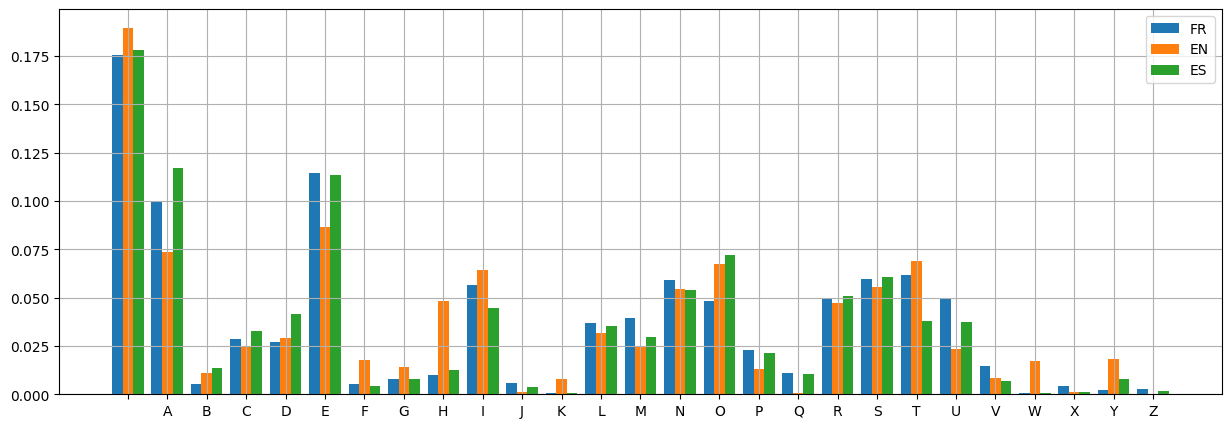

In [26]:
plot_distributions([cnt_ref_fr, cnt_ref_en, cnt_ref_es], ['FR', 'EN', 'ES'])

### B.2 Manual Attack against Caesar Cipher

**QUESTION**: perform a manual (/visual) attack against Caesar cipher using frequency distributions.

In [27]:
caesar_alice = substitution_encrypt(alice, str.maketrans(alphaws, cshift(alphaws, 8)))
caesar_disparition = substitution_encrypt(disparition, str.maketrans(alphaws, cshift(alphaws, 5)))
caesar_curieux = substitution_encrypt(curieux, str.maketrans(alphaws, cshift(alphaws, 3)))

cnt_alice, cnt_disparition, cnt_curieux = Counter(alice), Counter(disparition), Counter(curieux)
cnt_caesar_alice, cnt_caesar_disparition, cnt_caesar_curieux = Counter(caesar_alice), Counter(caesar_disparition), Counter(caesar_curieux)

cnt_caesar_curieux.update({c:0 for c in alphaws})
cnt_caesar_disparition.update({c:0 for c in alphaws})

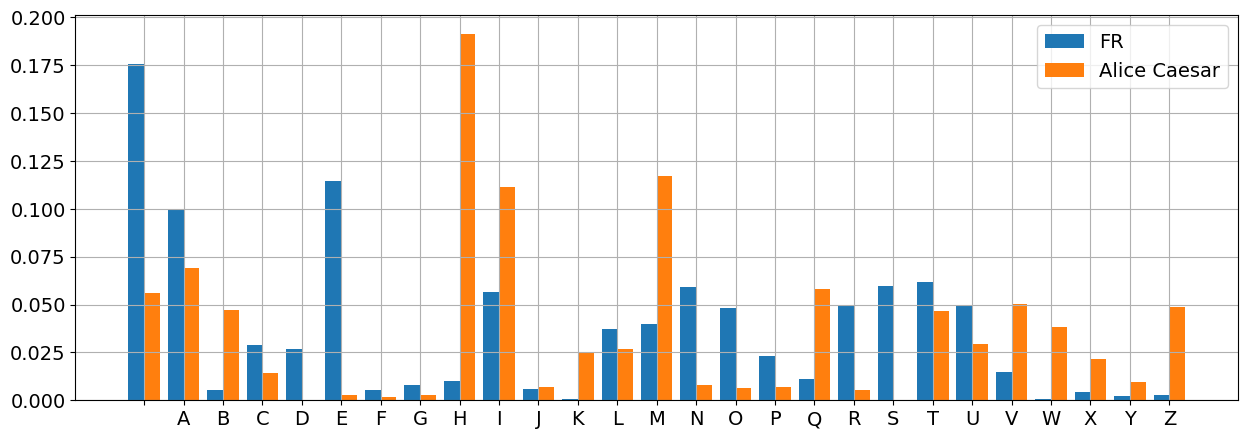

In [28]:
plot_distributions([cnt_ref_fr, cnt_caesar_alice], ['FR', 'Alice Caesar'])

**QUESTION**: attack other texts against the same reference.

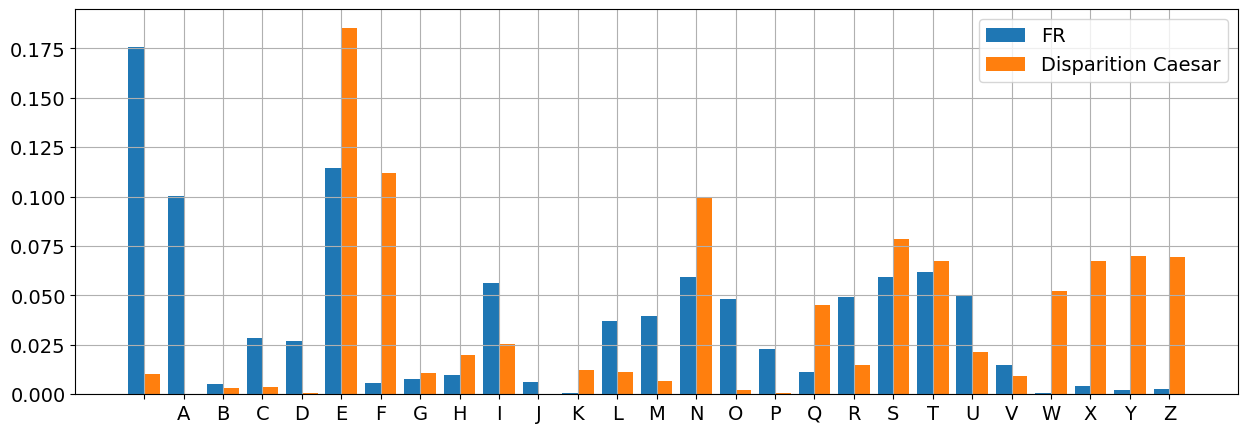

In [29]:
plot_distributions([cnt_ref_fr, cnt_caesar_disparition], ['FR', 'Disparition Caesar'])

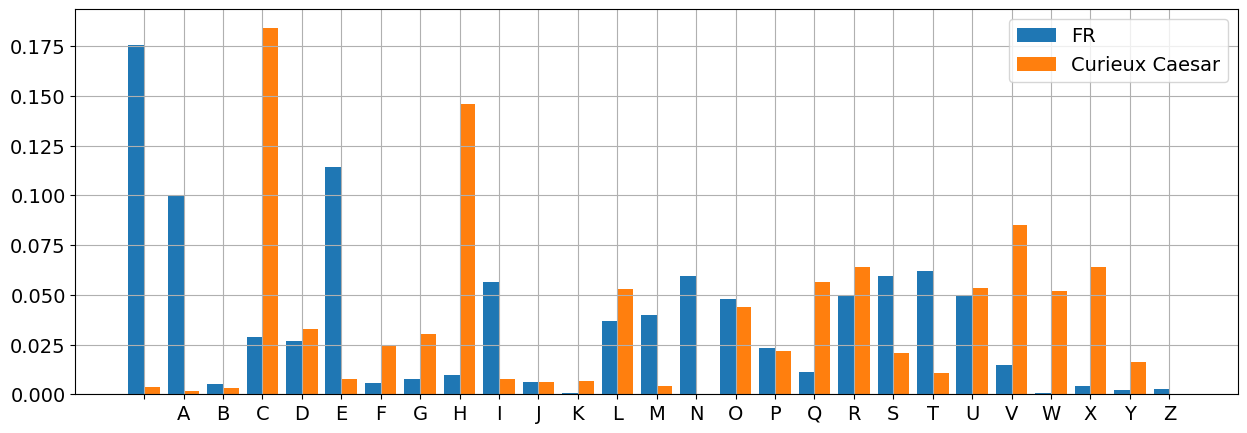

In [30]:
plot_distributions([cnt_ref_fr, cnt_caesar_curieux], ['FR', 'Curieux Caesar'])

### B.3 Algorithmic Attack against Caesar Cipher

**QUESTION**: study and implement an algorithmic attack against Caesar cipher using frequency distributions and the skeleton below.

```python
def attack_caesar(reference, ciphertext):
    "Attack 'ciphertext' using the frequency distribution of letters in 'reference'."
    pass
```

In [31]:
def frequences(s):
    "Returns a dictionary with frequences in % of letters"
    c = Counter(s)
    c = collections.OrderedDict(sorted(c.items()))
    n = sum(c.values())
    for k in c.keys():
        c[k] = c[k] * 100 / n
    return c

def cmp_freq(freq_ref, freq_reel):
    r = 0
    for c in freq_reel.keys():
        r += abs(freq_ref[c] - freq_reel[c])
    return r

def attack_caesar(reference, ciphertext):
    "Attack 'ciphertext' using the frequency distribution of letters in 'reference'."
# Version plus simple mais peu précise
#     freq_ref = frequences(reference)
#     freq_cyphertext = frequences(ciphertext)
#     c = min(freq_cyphertext, key=lambda y:abs(float(freq_cyphertext[y])-freq_ref[" "]))
#     k = list(freq_cyphertext.keys()).index(c)
#     return substitution_encrypt(ciphertext, str.maketrans(alphaws, cshift(alphaws, -k)))

# Version beaucoup moins performante mais beaucoup plus précise
    freq_ref = frequences(reference)
    sim = []
    for i in range(len(freq_ref)):
        d = substitution_encrypt(ciphertext, str.maketrans(alphaws, cshift(alphaws, -i)))
        freq_cyphertext = frequences(d)
        sim.append(cmp_freq(freq_ref, freq_cyphertext))
    k = sim.index(min(sim))
    print('shift value is:', k)
    
    x = np.linspace(0, 1, len(sim))
    y = sim
    xt = ["{}".format(c) for c in alphaws] # letter labels
    plt.xticks(x, xt)
    plt.plot(x, y)
    plt.show()
    
    return substitution_encrypt(ciphertext, str.maketrans(alphaws, cshift(alphaws, -k)))

shift value is: 8


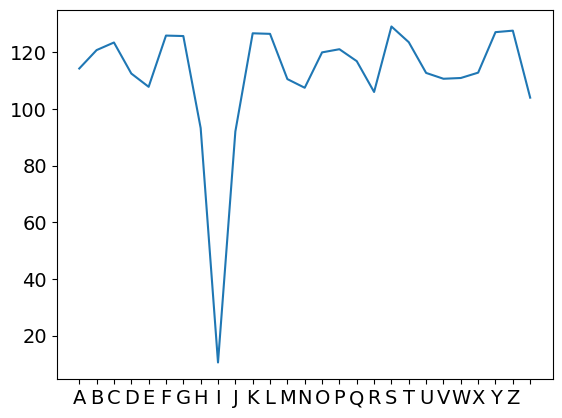

LEWIS CARROLL ALICE AU PAYS DES MERVEILLES NOTRE BARQUE GLISSE SUR LATMONDE QUE DORENT DE BRALANTS RAYONS SA MARCHE LENTE ET VAGABONDE TAMOIGNE QUE DES BRAS MIGNONS PLEINS DATMARDEUR MAIS ENCORE NOVICES TOUT FIERS DE CE NOUVEAU TRAVAIL MA NENT AU GRA


In [32]:
print(attack_caesar(ref_fr, caesar_alice)[:250])

shift value is: 5


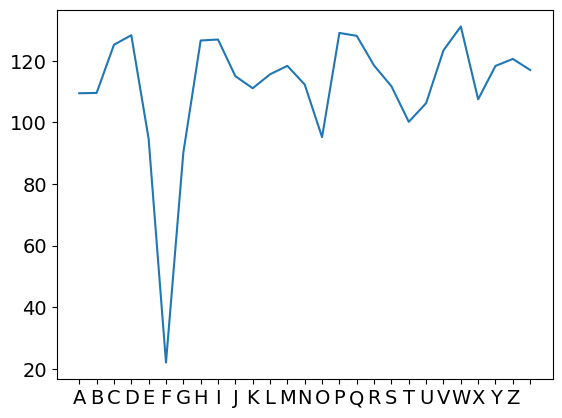

QUI D ABORD A L AIR D UN ROMAN JADIS FAIT OA IL S AGISSAIT D UN INDIVIDU QUI DORMAIT TOUT SON SAOUL ANTON VOYL N ARRIVAIT PAS A DORMIR IL ALLUMA SON JAZ MARQUAIT MINUIT VINGT IL POUSSA UN PROFOND SOUPIR S ASSIT DANS SON LIT S APPUYANT SUR SON POLOCHO


In [33]:

print(attack_caesar(ref_fr, caesar_disparition)[:250])

shift value is: 3


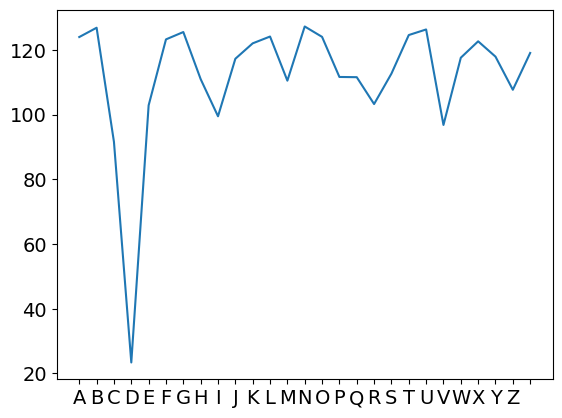

RACIT CHA RE BONNE VOUS AATES BIEN IMPARIEUSE BIEN DESPOTE COMAMENT VOULEZ VOUS QU UNE PLUME DOCILE INSCRIVE ICI SUR VOTRE ORDRE UN RACIT FIDA LE DES VICISASITUDES DE NOS COURSES PUISQUE JE DOIS SUBIR LE FREIN QUI M EST SI CRUELLEMENT IMPOSA QUE DASI


In [34]:
print(attack_caesar(ref_fr, caesar_curieux)[:250])

### B.4 Frequency Distribution for the Vigenere Cipher

**QUESTION**: Plot the distribution of the letters frequency in ciphertexts encrypted using Vigenère method.

**QUESTION**: What is the impact on the previous attack method?

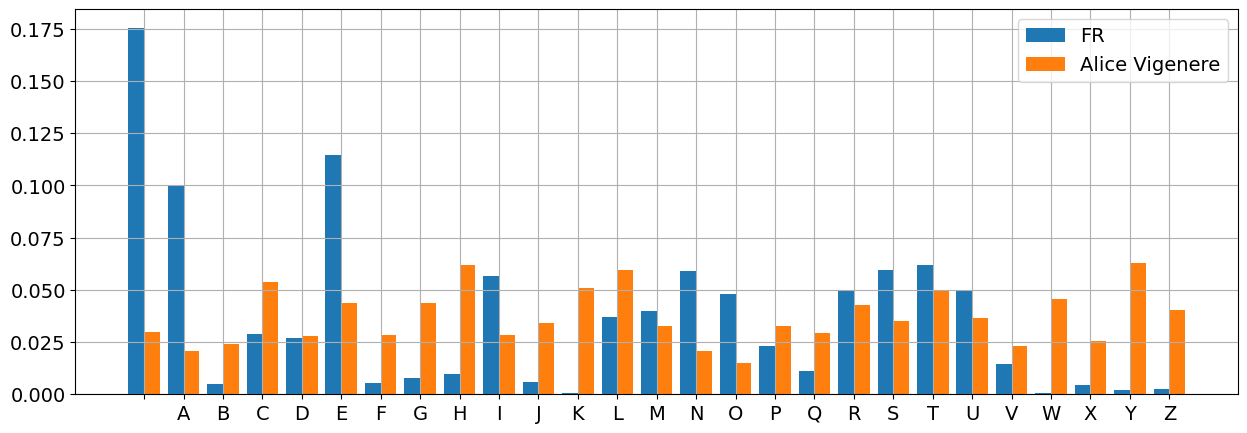

In [35]:
vig_alice = vig_encrypt(alice, "IUHFDSLZ", vig_table())
cnt_vig_alice = Counter(vig_alice)
plot_distributions([cnt_ref_fr, cnt_vig_alice], ['FR', 'Alice Vigenere'])